<a href="https://colab.research.google.com/github/Newborn1937/zdetect/blob/main/vk_group_members_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Get group members from vk

In [12]:
# Install vk api
!pip install vk==2.0.2

import gdown

# Load utility for high-level interaction with vk
url = 'https://raw.githubusercontent.com/Newborn1937/zdetect/main/vk_utils.py'
gdown.download(url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://raw.githubusercontent.com/Newborn1937/zdetect/main/vk_utils.py
To: /content/vk_utils.py
8.29kB [00:00, 7.58MB/s]                   


'vk_utils.py'

In [2]:
import vk_utils

# Initialize vk api
vk = vk_utils.VkAPI()

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
from google.colab import files
import os
import pickle

# Put group names or indices here
#group_idx = ['russia', 'zogolovok']
group_idx = ['putin_z', 'vladimir_vladimirovichp', 'putin_govorit', 'putintoday',
             'putin_vs_veteran', 'moskvaputinu', 'putin_2014', 'putin_lider',
             'moy_putin', 'putineveryday']

dirpath_out = '/content/gdrive/MyDrive/vk_group_members'

# Get group members from vk
members = {}
for group_id in group_idx:
  print(group_id)
  # Get from vk
  members[group_id] = vk.load_group_members(
      group_id, ntoload='all', offset=0, sort_type='id_desc', fields=None)
  # Save the result
  fname_out = f'{group_id}_members.pkl'
  fpath_out = os.path.join(dirpath_out, fname_out)
  with open(fpath_out, 'wb') as fid:
    pickle.dump(members, fid)

# Download members' data to the local drive
#files.download(fname_out)


putin_z


283973it [00:56, 5050.70it/s]


vladimir_vladimirovichp


592413it [01:57, 5024.24it/s]                            


putin_govorit


86746it [00:17, 4907.49it/s]


putintoday


61804it [00:12, 5022.95it/s]


putin_vs_veteran


222it [00:00, 3635.17it/s]             


moskvaputinu


403311it [01:20, 4987.13it/s]                            


putin_2014


3720it [00:01, 3283.56it/s]


putin_lider


83093it [00:16, 4985.45it/s]


moy_putin


163469it [00:33, 4932.06it/s]                            


putineveryday


21259it [00:04, 4598.12it/s]                           


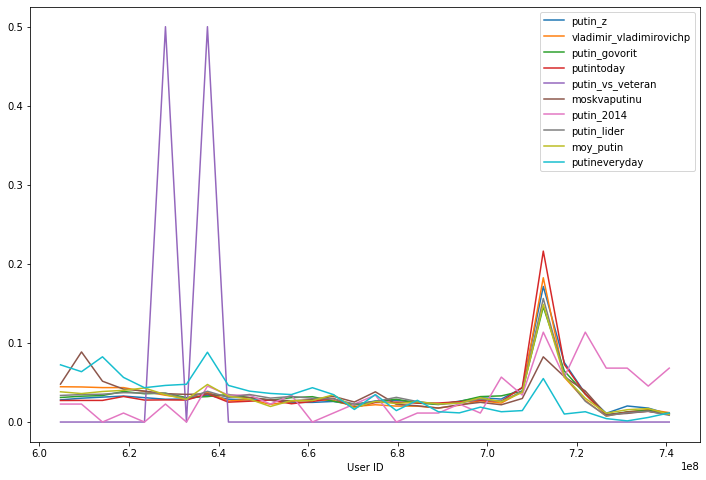

In [9]:
import matplotlib.pyplot as plt
import numpy as np

nbins = 30
hbins = None
h = {}

# Calculate histograms of member indices
for group_id in group_idx:
  member_idx = np.array(members[group_id])
  member_idx = member_idx[member_idx > 6e8]
  if hbins is None:
    hh, hbins = np.histogram(member_idx, nbins)
  else:
    hh, _ = np.histogram(member_idx, hbins)
  hh = hh / np.sum(hh)
  h[group_id] = hh

# Visualize the result
plt.figure(figsize=(12,8))
for group_id in group_idx:
  Nmembers = len(members[group_id])
  plt.plot(hbins[1:], h[group_id], label=f'{group_id} ({Nmembers})')
plt.xlabel('User ID')
plt.legend()
